In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [15]:
root='/Users/uranus/workarea/bke'
odir=""
filename="cke_bksx.nc"
fh=Dataset(root+'/data/outs/'+filename,mode='r',format="NETCDF4")
#print(fh)
nlats=fh.dimensions['lat'].size
nlons=fh.dimensions['lon'].size

nlons=int(nlons)
nlats=int(nlats)
rlon=np.array(fh["lon"])
rlat=np.array(fh["lat"])
z=np.array(fh["bat"])
z=np.where(z>-5.,0.,z)
bke=np.array(fh["bke"])

In [16]:
lats,lons= np.meshgrid(rlat,rlon)

proj = ccrs.PlateCarree()

ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',facecolor=cfeature.COLORS['water'])
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',facecolor=cfeature.COLORS['land'])
#coastline_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m')
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural', name='admin_1_states_provinces_lines',
    scale='50m', facecolor='none')

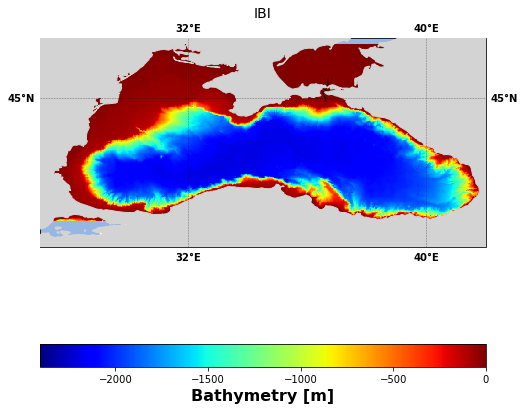

In [25]:
fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(8, 12))
ax.set_extent([27, 42, 40, 47], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color='lightgray', edgecolor='black', zorder=17)
ax.add_feature(cfeature.LAKES, alpha=0.9)
ax.add_feature(cfeature.BORDERS, zorder=10)
ax.add_feature(ocean_50m, zorder=1)
  # cfeature.COASTLINE, zorder=10)
#  ax.add_feature(coastline_50m, edgecolor='black', zorder=16)
ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5,
                    linestyle='--', draw_labels=True, zorder=18)
gl.tpop_xlabels = False
gl.left_ylabels = True
gl.right_ylabels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-6,0, 8, 16, 24, 32, 40])
gl.ylocator = mticker.FixedLocator([28,30, 35, 40, 45, 48])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'color': 'black', 'weight': 'bold'}

c = z
#print(np.shape(z),np.shape(lons),np.shape(lats))
cm = plt.pcolormesh(lons, lats, c, transform=ccrs.PlateCarree(), cmap='jet')
cb = fig.colorbar(cm, ax=ax, orientation='horizontal', fraction=0.08, aspect=20,
                    )#ticks=[-2000,-500, -200,-150, 100, -80, -60,-40,-20])

plt.title('IBI' , fontsize=14)
cb.set_label(r'Bathymetry [m]', rotation=0,weight='bold', fontsize=16)
lab = root + '/bat_bks.jpg'
plt.savefig(lab, dpi=120)



In [22]:
lats,lons= np.meshgrid(rlat,rlon)

proj = ccrs.PlateCarree()

ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',facecolor=cfeature.COLORS['water'])
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',facecolor=cfeature.COLORS['land'])
#coastline_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m')
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural', name='admin_1_states_provinces_lines',
    scale='50m', facecolor='none')

5.0E-02
2.7E+00
5.5E+01


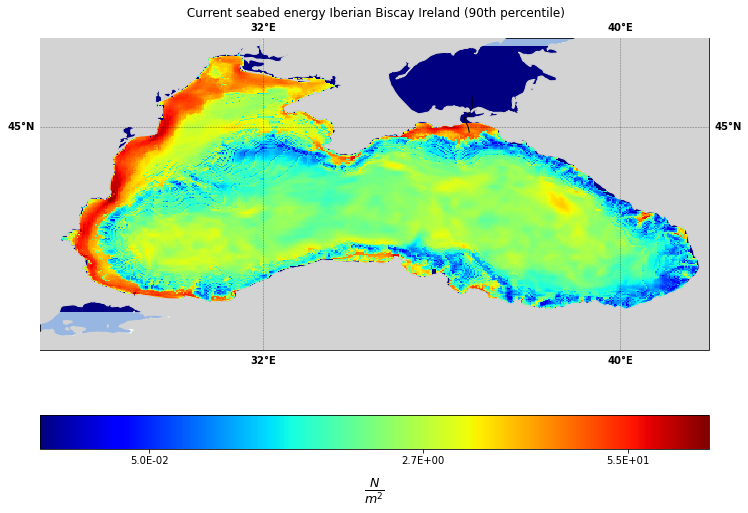

In [23]:
fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(12, 8))
ax.set_extent([27, 42, 40, 47], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color='lightgray', edgecolor='black', zorder=17)
ax.add_feature(cfeature.LAKES, alpha=0.9)
ax.add_feature(cfeature.BORDERS, zorder=10)
ax.add_feature(ocean_50m, zorder=1)
  # cfeature.COASTLINE, zorder=10)
#  ax.add_feature(coastline_50m, edgecolor='black', zorder=16)
ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5,
                    linestyle='--', draw_labels=True, zorder=18)
gl.tpop_xlabels = False
gl.left_ylabels = True
gl.right_ylabels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-6,0, 8, 16, 24, 32, 40])
gl.ylocator = mticker.FixedLocator([28,30, 35, 40, 45, 48])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'color': 'black', 'weight': 'bold'}

#
thr=500
cc=np.where(bke>thr,np.log(thr),np.log(bke+0.01))
#cc = np.log(bke+0.000001)
cc_min = np.min(cc)
cc_max = np.max(cc)
#print(np.shape(z),np.shape(lons),np.shape(lats))
cm = plt.pcolormesh(lons, lats, cc, transform=ccrs.PlateCarree(), cmap='jet',vmin=cc_min, vmax=cc_max)
lab=r'$\frac{N}{m^2}$'
#cb = m.colorbar(p,"bottom", ticks=[-4,-2,-0,2,5],size="5%", pad="10%")
cb = fig.colorbar(cm, ax=ax, orientation='horizontal', fraction=0.08, aspect=20,)
cb.set_label(lab, rotation=0)
cb.set_label(lab, fontsize=18, labelpad=10, fontweight='bold' )
#tkk=[-4,-2,-0,2,5]
tkk=[-3,1,4]
ltk=np.exp(tkk)
stk=[]
for ff in ltk:
    print ('%5.1E' % ff)
    stk.append( '%5.1E' % ff)
cb.set_ticks(tkk)
cb.ax.set_xticklabels(stk)
plt.title(r' Current seabed energy Iberian Biscay Ireland (90th percentile)' )
              
#plt.title('Mar Mediterraneo' , fontsize=14)
#cb.set_label(r'Bathymetry [m]', rotation=0,weight='bold', fontsize=16)
lab = root + '/bke_bks.jpg'
plt.savefig(lab, dpi=120)
plt.show()  

In [24]:
root='/Users/uranus/workarea/bke'
odir=""
filename="tands_ibi_out.nc"
fh=Dataset(root+'/data/outs/'+filename,mode='r',format="NETCDF4")
#print(fh)
nlats=fh.dimensions['lat'].size
nlons=fh.dimensions['lon'].size

nlons=int(nlons)
nlats=int(nlats)
rlon=np.array(fh["lon"])
rlat=np.array(fh["lat"])
z=np.array(fh["bat"])
z=np.where(z>-5.,0.,z)
bke=np.array(fh["btemp"])
bke=np.array(fh["bsal"])

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/uranus/workarea/bke/data/outs/tands_ibi_out.nc'

In [15]:
cc_max,cc_min

(1e-04, 1e-04)

In [37]:
np.max(bke)

20.038816